In [12]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn import preprocessing, svm, model_selection
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
merged_path = "C:/Users/ozgur/Desktop/dev/Fantasy-Basketball-Player-Recomendation-System/ML/main_merged2.csv"
merged_df = pd.read_csv(merged_path, index_col=None, header=0)
merged_df.drop(['Pos', 'Date', 'STL_AVG', 'BLK Last Week',
       'USG_perc', 'DRtg', 'ORtg', 'AST_perc', 'DRB_perc', 'ORB_perc', 'Starter',
       'BLK_perc', 'TOV_perc', 'STL_perc', 'eFG_perc', 'MP', 'FG', 'FGA',
               'FG_perc', '3P', '3PA', '3P_perc', 'FT', 'FTA', 'BLK Last Month', 'TRB_AVG',
       'FT_perc', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'W', 'BLK_AVG', 'FG_AVG', 'FGA_AVG', 'FG_perc_AVG', 'FG_AVG Last Week',
       'FGA_AVG Last Week', 'FG_perc_AVG Last Week', 'FG_AVG Last Month',
       'FGA_AVG Last Month', 'FG_perc_AVG Last Month', 'AST Last Month', 'AST Last Week', 'AST_AVG', 'AST'], axis=1, inplace=True)


missing_data = merged_df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")
    
print(merged_df.dtypes)
print(merged_df.shape)
print(merged_df.columns)
print(merged_df)

Name
False    28911
Name: Name, dtype: int64

Team
False    28911
Name: Team, dtype: int64

Home
False    28911
Name: Home, dtype: int64

PTS
False    28911
Name: PTS, dtype: int64

PG
False    28911
Name: PG, dtype: int64

SG
False    28911
Name: SG, dtype: int64

F
False    28911
Name: F, dtype: int64

C
False    28911
Name: C, dtype: int64

PTS_AVG Last Month
False    28911
Name: PTS_AVG Last Month, dtype: int64

PTS_AVG Last Week
False    28911
Name: PTS_AVG Last Week, dtype: int64

PTS_AVG
False    28911
Name: PTS_AVG, dtype: int64

MP_AVG
False    28911
Name: MP_AVG, dtype: int64

Opp
False    28911
Name: Opp, dtype: int64

Name                   object
Team                   object
Home                    int64
PTS                     int64
PG                      int64
SG                      int64
F                       int64
C                       int64
PTS_AVG Last Month    float64
PTS_AVG Last Week     float64
PTS_AVG               float64
MP_AVG                float64
Op

In [7]:
temp_path = "C:/Users/ozgur/Desktop/dev/Fantasy-Basketball-Player-Recomendation-System/ML/data/Merged/df_2018-19.csv"
temp_df = pd.read_csv(temp_path, index_col=None, header=0)
merged_df['Opp'] = np.nan

for index, row in temp_df.iterrows():
    if row['W'] == row['Team']:
        merged_df.loc[index, ['Opp']] = row['L']
    else:
        merged_df.loc[index, ['Opp']] = row['W']
        
merged_df

,Name,Pos,Date,Starter,Team,Home,W,W_PTS,L_PTS,MP,...,FGA_AVG,FG_perc_AVG,FG_AVG Last Week,FGA_AVG Last Week,FG_perc_AVG Last Week,AST_AVG,FG_AVG Last Month,FGA_AVG Last Month,FG_perc_AVG Last Month,Opp
0,Terry Rozier,PG/SG,2018-10-16,0,BOS,1,1,105,87,26.52,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,PHI
1,Kyrie Irving,PG,2018-10-16,1,BOS,1,1,105,87,29.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,PHI
2,Marcus Smart,PG/SG,2018-10-16,0,BOS,1,1,105,87,25.02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,PHI
3,Brad Wanamaker,PG,2018-10-16,0,BOS,1,1,105,87,0.82,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,PHI
4,Jayson Tatum,SF/PF,2018-10-16,1,BOS,1,1,105,87,28.93,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28906,Royce O'Neale,SF,2019-04-10,1,UTA,0,0,143,137,24.85,...,4.160494,0.474777,2.000000,5.500000,0.363636,1.518519,2.125000,4.562500,0.465753,LAC
28907,Tyler Cavanaugh,PF,2019-04-10,0,UTA,0,0,143,137,15.58,...,0.421053,0.375000,0.250000,0.500000,0.500000,0.000000,0.250000,0.500000,0.500000,LAC
28908,Ekpe Udoh,C,2019-04-10,1,UTA,0,0,143,137,28.78,...,0.812500,0.692308,1.750000,2.250000,0.777778,0.287500,1.062500,1.625000,0.653846,LAC
28909,Tony Bradley,C,2019-04-10,0,UTA,0,0,143,137,24.22,...,0.800000,0.250000,0.333333,0.333333,1.000000,0.000000,0.250000,0.250000,1.000000,LAC


In [21]:
temp_path = "C:/Users/ozgur/Desktop/dev/Fantasy-Basketball-Player-Recomendation-System/ML/merged6.csv"
temp_df = pd.read_csv(temp_path, index_col=None, header=0)

merged_df['STL_AVG'] = temp_df['STL_AVG']

In [25]:
merged_df.to_csv("main_merged2.csv", encoding='utf-8', index=False)

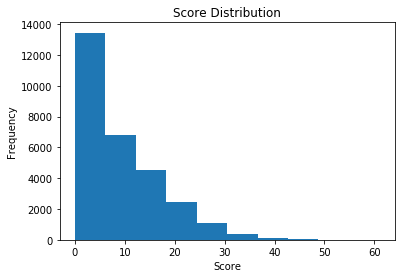

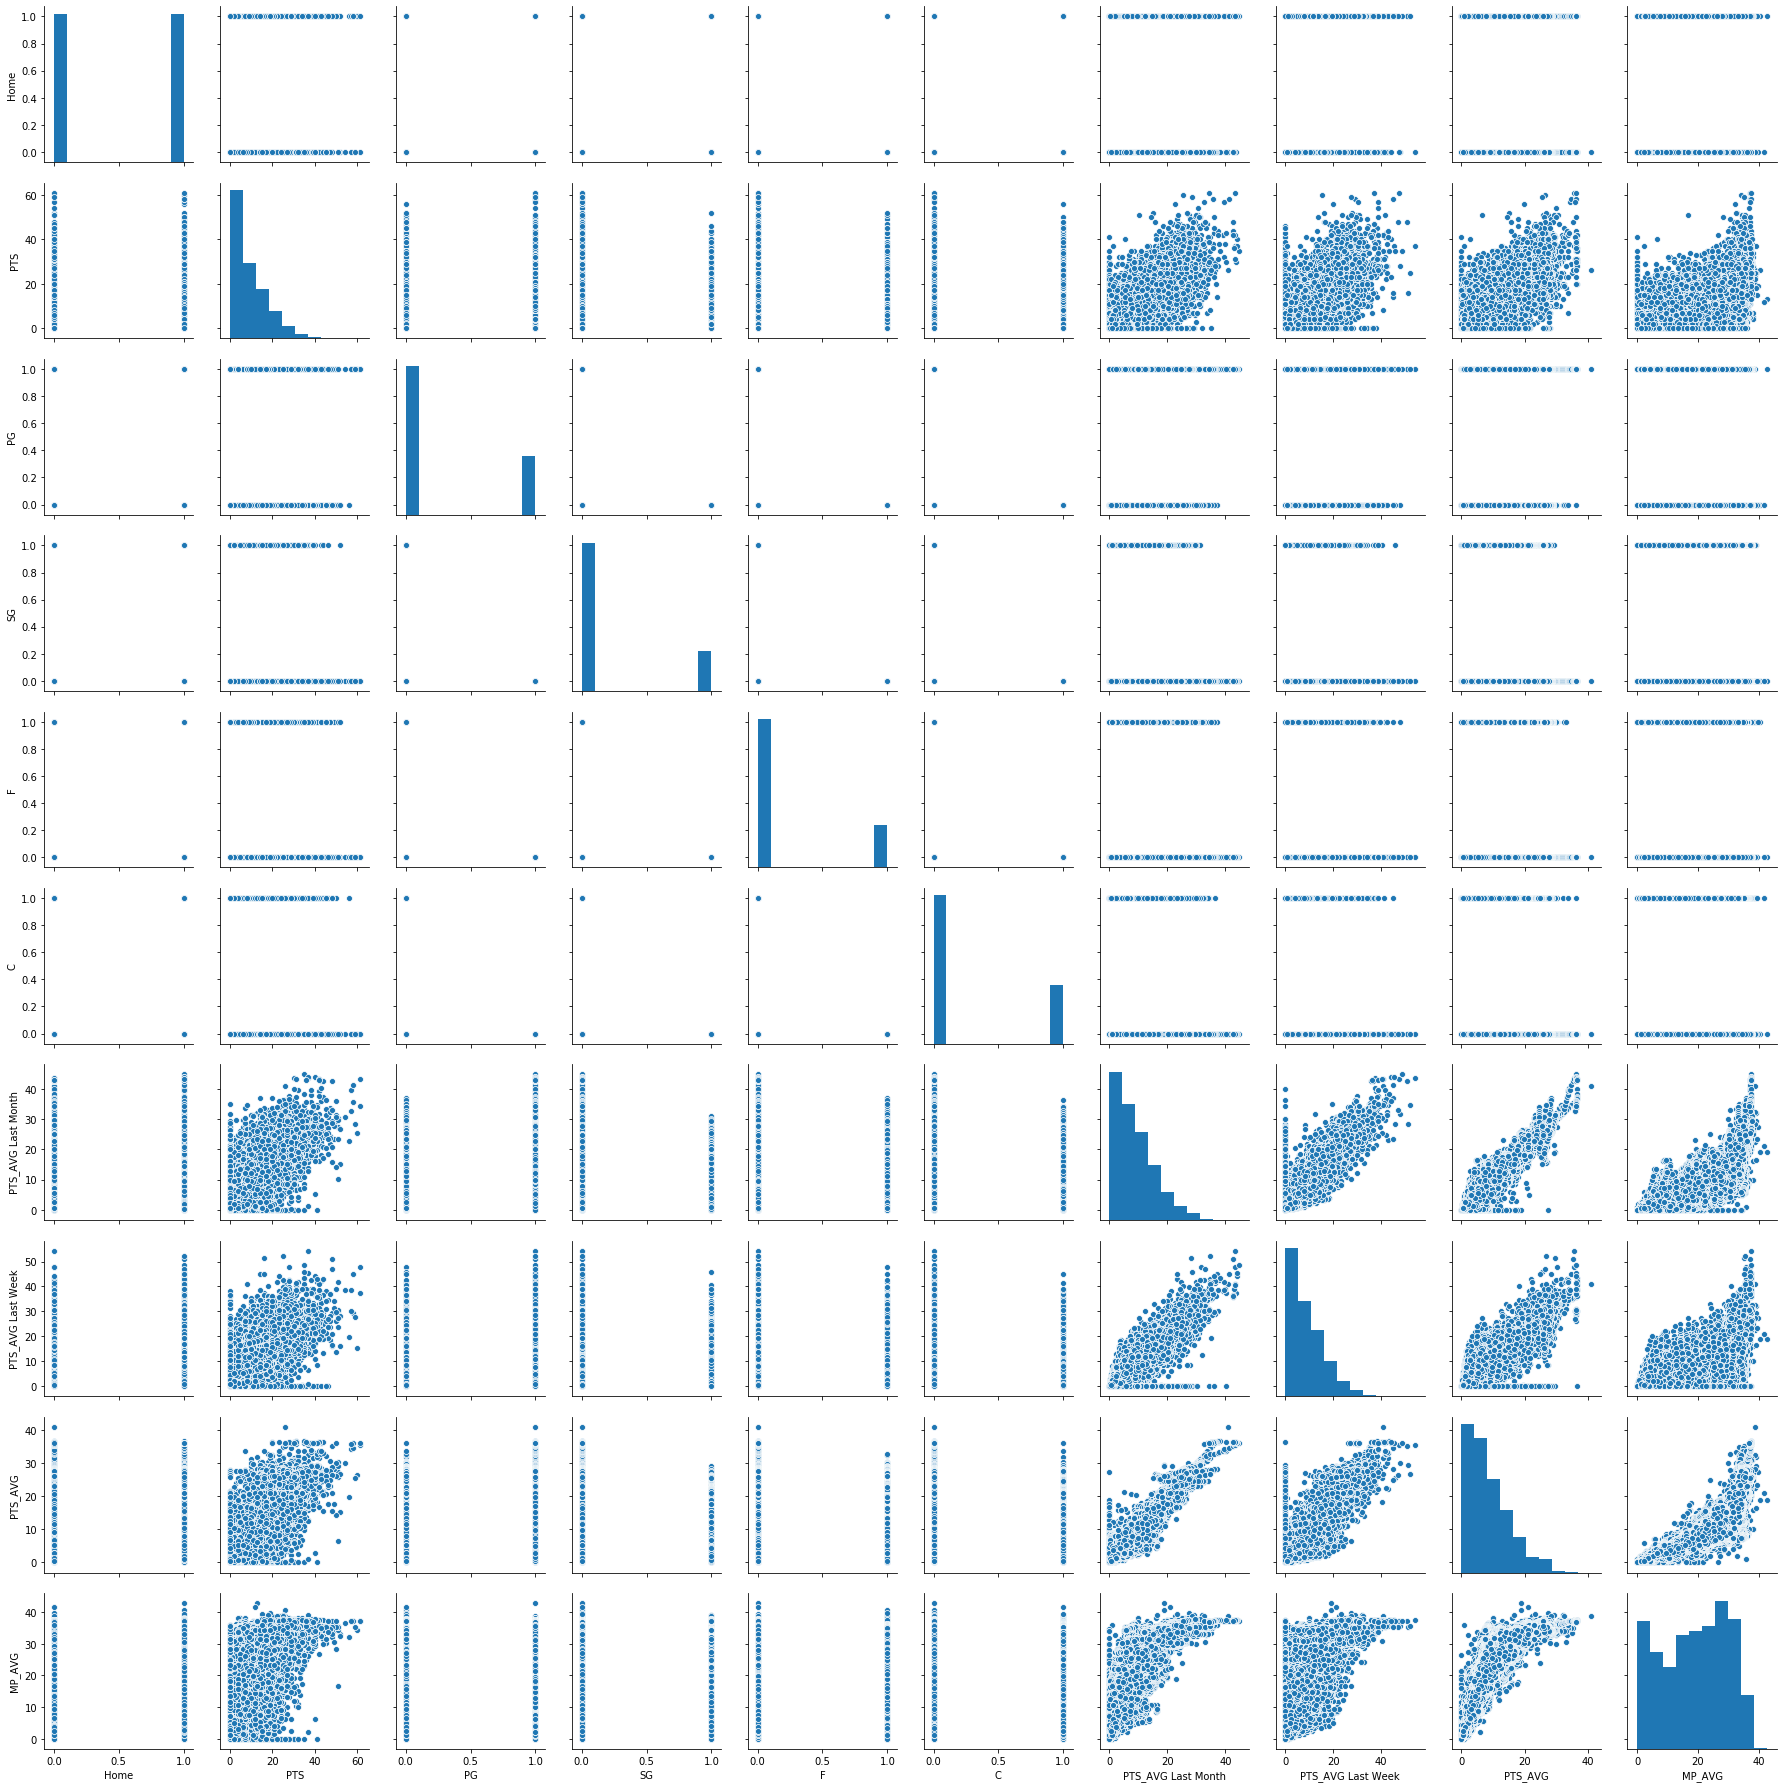

In [13]:
print(merged_df.describe())

# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(merged_df['PTS'])
# set title and labels
ax.set_title('Score Distribution')
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')

sns.pairplot(merged_df)

In [9]:
print(merged_df.columns)
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm')


Index(['Name', 'Team', 'Home', 'PTS', 'PG', 'SG', 'F', 'C',
       'PTS_AVG Last Month', 'PTS_AVG Last Week', 'PTS_AVG', 'MP_AVG', 'Opp'],
      dtype='object')


,Home,PTS,PG,SG,F,C,PTS_AVG Last Month,PTS_AVG Last Week,PTS_AVG,MP_AVG
Home,1,0.0139169,-0.00260468,0.000535854,-0.000295368,0.00238869,0.0046027,0.00318971,0.00335305,0.00421069
PTS,0.0139169,1,0.0702379,-0.00279076,-0.0264314,-0.0432348,0.7269,0.681918,0.718845,0.627222
PG,-0.00260468,0.0702379,1,-0.325249,-0.335532,-0.394208,0.0834136,0.0766214,0.0816308,0.0698826
SG,0.000535854,-0.00279076,-0.325249,1,-0.277476,-0.325999,-0.00367302,-0.0043512,0.00359977,0.0438251
F,-0.000295368,-0.0264314,-0.335532,-0.277476,1,-0.336305,-0.0318316,-0.0284276,-0.0245188,0.0114251
C,0.00238869,-0.0432348,-0.394208,-0.325999,-0.336305,1,-0.0506115,-0.0463536,-0.0621788,-0.120114
PTS_AVG Last Month,0.0046027,0.7269,0.0834136,-0.00367302,-0.0318316,-0.0506115,1,0.8974,0.965107,0.846187
PTS_AVG Last Week,0.00318971,0.681918,0.0766214,-0.0043512,-0.0284276,-0.0463536,0.8974,1,0.862842,0.752522
PTS_AVG,0.00335305,0.718845,0.0816308,0.00359977,-0.0245188,-0.0621788,0.965107,0.862842,1,0.882953
MP_AVG,0.00421069,0.627222,0.0698826,0.0438251,0.0114251,-0.120114,0.846187,0.752522,0.882953,1
